<h3> Project Question and Dataset </h3>

The stock market is supposedly based on real world events, so I plan to predict the change in the Dow Jones Industrial Average from open to close and from day-to-day using the Top 25 news headlines of each day.

The data I found combined data of Dow prices along with daily top 25 headlines from the page 'WorldNews' within Reddit.com. The stories and links are constantly checked by moderators to ensure accuracy and prevent misleading or fake news.

I became interested in predicting stocks early on thinking that there is so much data out there and so many potential numerical features this would be a good first true Data Science Project for myself, and would be something that I could show employers. Secondly, as a bit of a get-rich-quick scheme, I could figure out the stock market, make a bunch of money, and skip the whole get a job after college thing. Then after our NLP class, one of my favorites all summer, I wanted to use NLP techniques in my project. Luckily I found this great combined Dow and News dataset.

<h3> EDA </h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
# read in news headlines dataset
raw_combined = pd.read_csv('stocknews/Combined_News_DJIA.csv')
print raw_combined.shape
raw_combined.tail(2)

(1989, 27)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1987,2016-06-30,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
1988,2016-07-01,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...


In [3]:
# read in DJIA dataset
raw_DJIA = pd.read_csv('stocknews/DJIA_table.csv')
print raw_DJIA.shape
raw_DJIA.head(3)

(1989, 7)


,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


In [4]:
# merge the two into one dataset by date
data = raw_DJIA.merge(raw_combined, how='outer')
data.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,...,Googles free wifi at Indian railway stations i...,Mounting evidence suggests 'hobbits' were wipe...,The men who carried out Tuesday's terror attac...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,...,"Escape Tunnel, Dug by Hand, Is Found at Holoca...",The land under Beijing is sinking by as much a...,Car bomb and Anti-Islamic attack on Mosque in ...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...


In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
Label          int64
Top1          object
Top2          object
Top3          object
Top4          object
Top5          object
Top6          object
Top7          object
Top8          object
Top9          object
Top10         object
Top11         object
Top12         object
Top13         object
Top14         object
Top15         object
Top16         object
Top17         object
Top18         object
Top19         object
Top20         object
Top21         object
Top22         object
Top23         object
Top24         object
Top25         object
dtype: object

In [6]:
df = data
# turn the News headlines from 25 columns into 1 for text analysis
data['News1_10'] = df[['Top1']].values + df[['Top2']].values + df[['Top3']].values + df[['Top4']].values + df[['Top5']].values + df[['Top6']].values + df[['Top7']].values + df[['Top8']].values + df[['Top9']].values + df[['Top10']].values
# had to change some datatypes to str to allow for concatenation
data.Top23 = data.Top23.astype('str')
data.Top24 = data.Top24.astype('str')
data.Top25 = data.Top25.astype('str')
data['News11_25'] = df[['Top11']].values + df[['Top12']].values + df[['Top13']].values + df[['Top14']].values + df[['Top15']].values + df[['Top16']].values + df[['Top17']].values + df[['Top18']].values  + df[['Top19']].values + df[['Top20']].values  + df[['Top21']].values  + df[['Top22']].values + df[['Top23']].values + df[['Top24']].values + df[['Top25']].values
data['News_all'] = data.News1_10 + data.News11_25
data.head(3)

,Date,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,News1_10,News11_25,News_all
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...,A 117-year-old woman in Mexico City finally re...,France Cracks Down on Factory Farms - A viral ...,A 117-year-old woman in Mexico City finally re...
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,1,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,...,Calls to suspend Saudi Arabia from UN Human Ri...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...,Jamaica proposes marijuana dispensers for tour...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Jamaica proposes marijuana dispensers for tour...
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,...,Emaciated lions in Taiz Zoo are trapped in blo...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...,Explosion At Airport In IstanbulYemeni former ...,A chatbot programmed by a British teenager has...,Explosion At Airport In IstanbulYemeni former ...


In [7]:
# get rid of extra columns
data = data.iloc[:,[0,1,2,3,4,5,6,33,34,35]]
data.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,News1_10,News11_25,News_all
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,A 117-year-old woman in Mexico City finally re...,France Cracks Down on Factory Farms - A viral ...,A 117-year-old woman in Mexico City finally re...
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,Jamaica proposes marijuana dispensers for tour...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Jamaica proposes marijuana dispensers for tour...


<h3>EDA - investigate sentiment </h3>

In [8]:
# create a sentiment columns
def create_sentiment_array(df_name,col_name):
    sentiment_array = []
    for i in range(1989):
        text = df_name[col_name][i]
        blob = TextBlob(text)
        sentiment_array.append(blob.sentiment.polarity)
    return sentiment_array

sentiment_array = create_sentiment_array(data,'News_all')


In [9]:
data['sentiment'] = sentiment_array
data.head(3)

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Volume,Adj Close,News1_10,News11_25,News_all,sentiment
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,A 117-year-old woman in Mexico City finally re...,France Cracks Down on Factory Farms - A viral ...,A 117-year-old woman in Mexico City finally re...,-0.036532
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,Jamaica proposes marijuana dispensers for tour...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Jamaica proposes marijuana dispensers for tour...,-0.005811
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,Explosion At Airport In IstanbulYemeni former ...,A chatbot programmed by a British teenager has...,Explosion At Airport In IstanbulYemeni former ...,0.046901


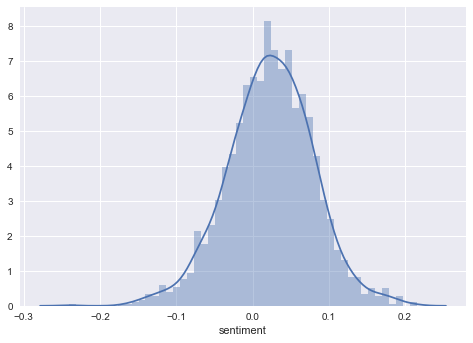

In [10]:
sns.distplot(a=data.sentiment,bins=50)

In [11]:
# now will create a Tomorrow's 'change_in_close' column as what I want to predict
close = data.iloc[:,4]
close_tomorrow = close.to_frame('close_tomorrow')
close_tomorrow.drop(len(data.index)-1,axis=0, inplace=True)
close_tomorrow.reset_index(inplace=True)
close_tomorrow.drop('index', axis=1,inplace=True)
# add in row row to adjut for the missing value from the 1 day offset
close_tomorrow.loc[-1] = 17840.62
close_tomorrow.index = close_tomorrow.index + 1 # shift the index
close_tomorrow = close_tomorrow.sort_index(axis=0) # sort by index
close_tomorrow.head(3)

# THIS OFFSETS THE CLOSE TO THE PREVIOUS DAY, NOT TOMORROW!!!!!!!!!!!!!!!!!

,close_tomorrow
0,17840.620000
1,17949.369141
2,17929.990234


In [12]:
data = data.join(close_tomorrow)
# had to input a value manually due to the 1-day offset
data.iloc[0,11] = 17840.62
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,News1_10,News11_25,News_all,sentiment,close_tomorrow
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,A 117-year-old woman in Mexico City finally re...,France Cracks Down on Factory Farms - A viral ...,A 117-year-old woman in Mexico City finally re...,-0.036532,17840.620000
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,Jamaica proposes marijuana dispensers for tour...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Jamaica proposes marijuana dispensers for tour...,-0.005811,17949.369141
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,Explosion At Airport In IstanbulYemeni former ...,A chatbot programmed by a British teenager has...,Explosion At Airport In IstanbulYemeni former ...,0.046901,17929.990234
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,"2,500 Scientists To Australia: If You Want To ...",British pound could hit history-making dollar ...,"2,500 Scientists To Australia: If You Want To ...",0.047618,17694.679688
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,Barclays and RBS shares suspended from trading...,In a birth offering hope to a threatened speci...,Barclays and RBS shares suspended from trading...,-0.030183,17409.720703


In [13]:
data['change_in_close'] = data['close_tomorrow'] - data['Close']

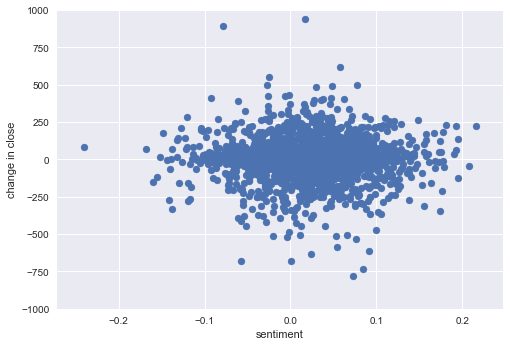

In [14]:
plt.scatter(x=data.sentiment, y=data.change_in_close)
plt.xlabel('sentiment')
plt.ylabel('change in close')
plt.ylim(-1000,1000)
plt.show()

<h3> Make this a classification problem </h3>

create 'nextday_change' column with 1 for increase and 0 for decrease

In [15]:
def create_change_array(df_name, col_name):
    change = df_name[col_name]
    change_array = [] 
    for i in range(len(change)):
        if change[i] > 0:
            change_array.append(1)
        else:
            change_array.append(0)
    return change_array

change_array = create_change_array(data,'change_in_close')

In [16]:
# append 'nextday_change' column an clean up dataframe
change_array = pd.DataFrame(change_array)
change_array = change_array.rename(columns={0:'nextday_change'})
data = data.join(change_array)
# data.drop('change_in_close', axis=1, inplace=True)
data.drop('close_tomorrow', axis=1, inplace=True)
data.drop('News1_10', axis=1,inplace=True)
data.drop('News11_25',axis=1, inplace=True)
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,News_all,sentiment,change_in_close,nextday_change
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,A 117-year-old woman in Mexico City finally re...,-0.036532,-108.749141,0
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,Jamaica proposes marijuana dispensers for tour...,-0.005811,19.378907,1
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,Explosion At Airport In IstanbulYemeni former ...,0.046901,235.310546,1
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,"2,500 Scientists To Australia: If You Want To ...",0.047618,284.958985,1
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,Barclays and RBS shares suspended from trading...,-0.030183,269.480469,1


In [17]:
data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close,News_all,sentiment,change_in_close,nextday_change
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,b'All the experts admit that we should legalis...,0.040677,43.970703,1
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,b' U.S. refuses Israel weapons to attack Iran:...,0.011398,82.969727,1
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,b'Remember that adorable 9-year-old who sang a...,-0.046530,-109.509766,0
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,b'Why wont America and Nato help us? If they w...,0.121956,-139.879882,0
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,"b""Georgia 'downs two Russian warplanes' as cou...",-0.048568,48.029297,1


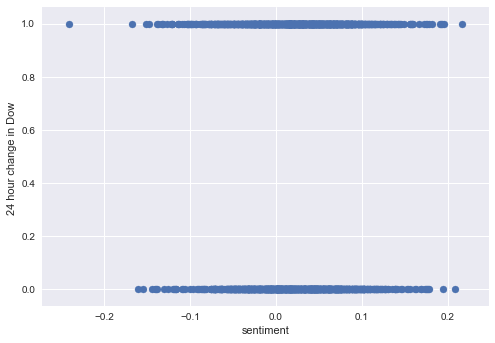

In [18]:
plt.scatter(x=data.sentiment,y=data.nextday_change)
plt.xlabel('sentiment')
plt.ylabel('24 hour change in Dow ')
plt.show()

<h2> Scrap the whole sentiment thing in favor of using count vectorizer </h2>

In [19]:
nextday_change = pd.DataFrame(data.nextday_change)
nextday_change = nextday_change.iloc[::-1]
nextday_change = nextday_change.reset_index(0,1989)
nextday_change.head()

,nextday_change
0,1
1,0
2,0
3,1
4,1


In [20]:
data = pd.read_csv('stocknews/Combined_News_DJIA.csv')
# data.head(2)

In [21]:
data = data.join(nextday_change.iloc[::-1])
data.drop('Label', axis=1,inplace=True)
data.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,nextday_change
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",1
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",0
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",0
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,1
4,2008-08-14,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal

In [22]:
# train and test split
# will go by date using approx 80-20 split
# train will be prior to 2015, and test will be everything after
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

In [23]:
train.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,nextday_change
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",1
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",0
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",0
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,1
4,2008-08-14,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal

In [24]:
def create_lowercase_news_array(df_name):
    news_array = []
    rows = range(0,len(df_name.index))
    for row in rows:
        news_array.append(' '.join(str(x).lower() for x in df_name.iloc[row, 1:26]))
    return news_array

train_news = create_lowercase_news_array(train)
test_news = create_lowercase_news_array(test)

In [25]:
train_news[0]

'b"georgia \'downs two russian warplanes\' as countries move to brink of war" b\'breaking: musharraf to be impeached.\' b\'russia today: columns of troops roll into south ossetia; footage from fighting (youtube)\' b\'russian tanks are moving towards the capital of south ossetia, which has reportedly been completely destroyed by georgian artillery fire\' b"afghan children raped with \'impunity,\' u.n. official says - this is sick, a three year old was raped and they do nothing" b\'150 russian tanks have entered south ossetia whilst georgia shoots down two russian jets.\' b"breaking: georgia invades south ossetia, russia warned it would intervene on so\'s side" b"the \'enemy combatent\' trials are nothing but a sham: salim haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'georgian troops retreat from s. osettain capital, presumably leaving several hundred people killed. [video]\' b\'did the u.s. prep georgia for war with russia?\'

<h3> Want to create some word clouds </h3>
First to get a sense of which words appear in train vs test sets <br>
Second for which words appear on increase days vs decrease says

In [26]:
from wordcloud import WordCloud

In [27]:
def str_array_to_long_string(array):
    string = ''
    for i in range(len(array)):
        string +=  str(array[i])
    return string

train_as_string = str_array_to_long_string(train_news)
test_as_string = str_array_to_long_string(test_news)

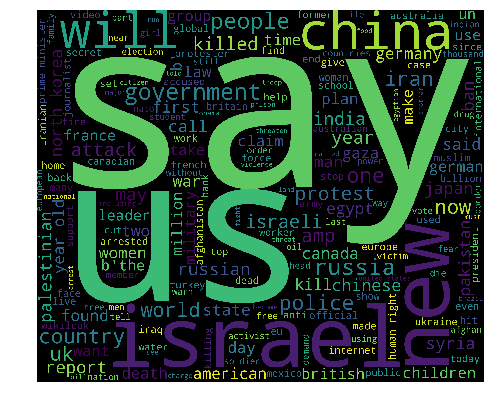

In [28]:
wordcloud_simple_train = WordCloud(background_color='black',
                                  width=3000,
                                  height=2500,
                                  ).generate(train_as_string)
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_simple_train)
plt.axis('off')
plt.show()

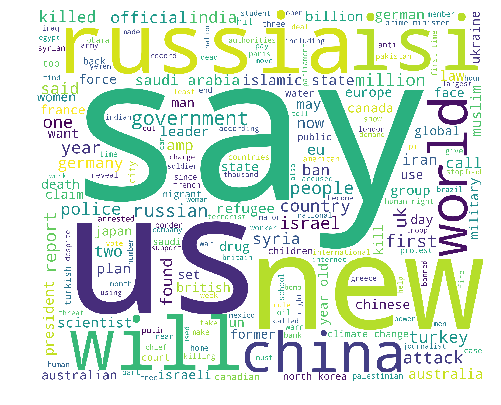

In [29]:
wordcloud_simple_test = WordCloud(background_color='white',
                                  width=3000,
                                  height=2500,
                                  ).generate(test_as_string)
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_simple_test)
plt.axis('off')
plt.show()

I was worried that keywords would change overtime, making it very difficult to use older news headlines to create an accurate classification model. Seeing that the train and test wordclouds are similar is promising. <br>
Still need to check increase vs decrease day wordclouds.

In [30]:
# now will check wordclouds for increase and decrease days
increase_alldata = data[data['nextday_change']==1]
decrease_alldata = data[data['nextday_change']==0]

In [31]:
increase_alldata.head(2)

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,nextday_change
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",1
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,1


In [32]:
increase_news_array = create_lowercase_news_array(increase_alldata)
decrease_news_array = create_lowercase_news_array(decrease_alldata)

increase_as_string = str_array_to_long_string(increase_news_array)
decrease_as_string = str_array_to_long_string(decrease_news_array)

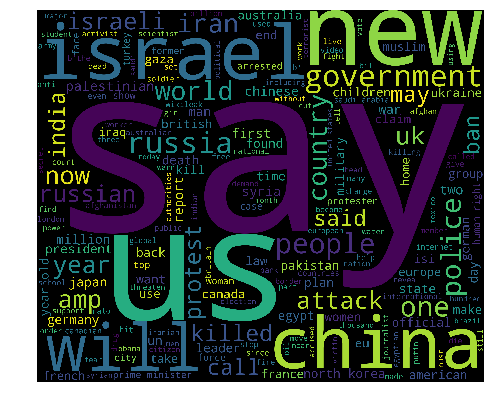

In [33]:
wordcloud_simple_increase = WordCloud(background_color='black',
                                  width=3000,
                                  height=2500,
                                  ).generate(increase_as_string)
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_simple_increase)
plt.axis('off')
plt.show()

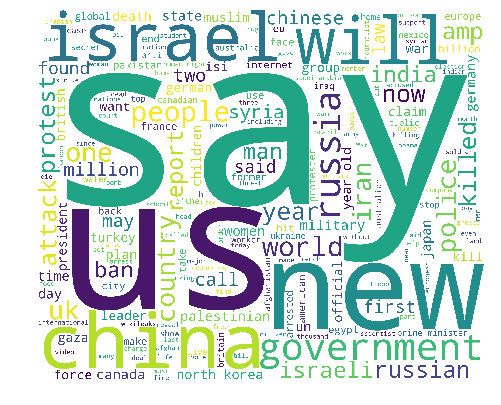

In [34]:
wordcloud_simple_decrease = WordCloud(background_color='white',
                                  width=3000,
                                  height=2500,
                                  ).generate(decrease_as_string)
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud_simple_decrease)
plt.axis('off')
plt.show()

The increase and decrease wordclouds are very similar, both with mainly political words.
Makes me think the classification results will not be very accurate.

Regardless I'll continue

<h2> Feature Creation </h2>
Will use a tf-idf vectorizer 

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_train_tfidf = tfidf_vect.fit_transform(train_news)
print X_train_tfidf.shape

X_test_tfidf = tfidf_vect.transform(test_news)
print X_test_tfidf.shape

(1611, 31675)
(378, 31675)


In [36]:
data.head()

,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,nextday_change
0,2008-08-08,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",1
1,2008-08-11,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",0
2,2008-08-12,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",0
3,2008-08-13,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,1
4,2008-08-14,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal

In [37]:
y_train = train.loc[:,'nextday_change']
y_test = test.loc[:,'nextday_change']

<h3> Model Creation </h3>
Will use Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

In [39]:
logreg = LogisticRegression()
gauss_nb = GaussianNB()
multi_nb = MultinomialNB()

In [69]:
# Applying grid search to find best model and best params
from sklearn.model_selection import GridSearchCV
params = [{'C':[0.000000001,0.00000001,0.0000001,0.000001], 'solver':['newton-cg'],
          'max_iter':[25,50,100,200]},
         {'C':[0.000000001,0.00000001,0.0000001,0.000001], 'solver':['liblinear']}]
grid_search = GridSearchCV(estimator=logreg,param_grid = params,scoring='accuracy',cv=10)
grid_search = grid_search.fit(X_train_tfidf, y_train)

best_accuracy = grid_search.best_score_
print 'best accuracy: ', best_accuracy
best_params = grid_search.best_params_
print 'best params: ', best_params

best accuracy:  0.542520173805
best params:  {'C': 1e-09, 'max_iter': 25, 'solver': 'newton-cg'}


In [70]:
logreg = LogisticRegression(C=0.000000001,solver='newton-cg', max_iter=25)
logreg = logreg.fit(X_train_tfidf, y_train)
gauss_nb = gauss_nb.fit(X_train_tfidf.toarray(), y_train)
multi_nb = multi_nb.fit(X_train_tfidf.toarray(), y_train)

In [71]:
y_pred_logreg = logreg.predict(X_test_tfidf)
y_pred_gauss = gauss_nb.predict(X_test_tfidf.toarray())
y_pred_multi = multi_nb.predict(X_test_tfidf.toarray())

In [81]:
prob_logreg = logreg.predict_proba(X_test_tfidf)[:,1]
prob_gauss = gauss_nb.predict_proba(X_test_tfidf.toarray())[:,1]
prob_multi = multi_nb.predict_proba(X_test_tfidf.toarray())[:,1]


In [82]:
accuracy_logreg = accuracy_score(y_pred_logreg, y_test)
accuracy_gauss = accuracy_score(y_pred_gauss, y_test)
accuracy_multi = accuracy_score(y_pred_multi, y_test)

Logistic regression accuracy score is: 0.505291005291


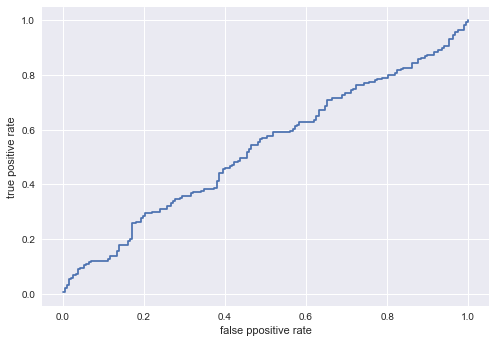

In [83]:
#logreg accuracy and roc curve:
print 'Logistic regression accuracy score is: ' + str(accuracy_logreg)
fpr, tpr, _ = roc_curve(y_test, prob_logreg)

plt.plot(fpr,tpr)
plt.xlabel('false ppositive rate')
plt.ylabel('true positive rate')
plt.show()

Gaussian Naive Bayes accuracy score is: 0.481481481481


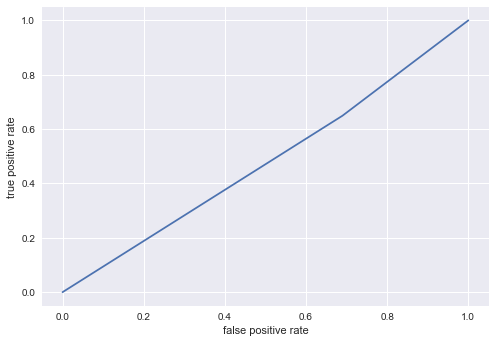

In [84]:
#Gaussian Naive Bayes accuracy and roc curve:
print 'Gaussian Naive Bayes accuracy score is: ' + str(accuracy_gauss)
fpr, tpr, _ = roc_curve(y_test, prob_gauss)

plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

Multi Naive Bayes accuracy score is: 0.505291005291


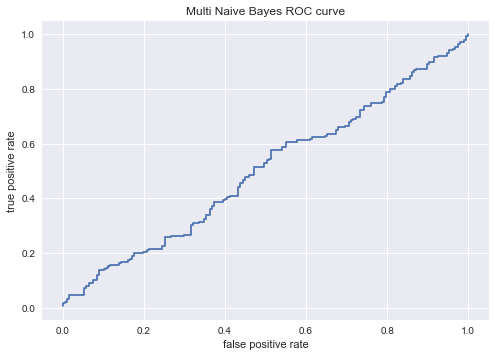

In [85]:
#Multi Naive Bayes accuracy and roc curve:
print 'Multi Naive Bayes accuracy score is: ' + str(accuracy_multi)
fpr, tpr, _ = roc_curve(y_test, prob_multi)

plt.plot(fpr,tpr)
plt.title('Multi Naive Bayes ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [49]:
# Applying grid search to find best model and best params
from sklearn.svm import SVC
svc = SVC(kernel="rbf",C=0.025,probability=True)
# params = [{'C':[0.01,0.1,0.025,1],'gamma':[0.001, 0.01, 0.1, 1]}]
# grid_search = GridSearchCV(estimator=svc,param_grid = params,scoring='accuracy',cv=10)
# # print svc.get_params().keys()
# grid_search = grid_search.fit(X_train_tfidf, y_train)

# best_accuracy = grid_search.best_score_
# print 'best accuracy: ', best_accuracy
# best_params = grid_search.best_params_
# print 'best params: ', best_params
svc = svc.fit(X_train_tfidf,y_train)
y_pred_svc = svc.predict(X_test_tfidf)
prob_svc = svc.predict_proba(X_test_tfidf)[:,1]
accuracy_svc = accuracy_score(y_pred_svc, y_test)

SVC accuracy score is: 0.505291005291


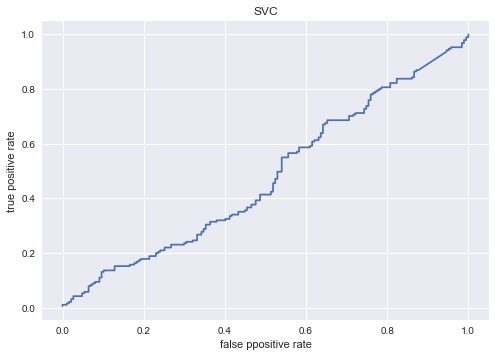

In [50]:
#SVC accuracy and roc curve:
print 'SVC accuracy score is: ' + str(accuracy_svc)
fpr, tpr, _ = roc_curve(y_test, prob_svc)

plt.plot(fpr,tpr)
plt.title('SVC')
plt.xlabel('false ppositive rate')
plt.ylabel('true positive rate')
plt.show()

In [53]:
advanced_vect = TfidfVectorizer( min_df=0.03, max_df=0.97, max_features = 200000, ngram_range = (2, 2))
X_train_advanced = advanced_vect.fit_transform(train_news)
print X_train_advanced.shape

(1611, 657)


In [64]:
logreg2 = LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200)
logreg2 = logreg2.fit(X_train_advanced, y_train)

In [65]:
X_test_advanced = advanced_vect.transform(test_news)

In [66]:
pred_logreg2 = logreg2.predict(X_test_advanced)
accuracy_logreg2 = accuracy_score(y_test,pred_logreg2)
prob_logreg2 = logreg2.predict_proba(X_test_advanced)[:,1]

Logistic regression 2 accuracy score is: 0.505291005291


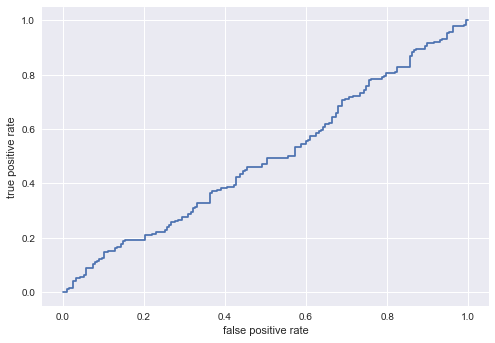

In [67]:
#logreg2 accuracy and roc curve:
print 'Logistic regression 2 accuracy score is: ' + str(accuracy_logreg2)
fpr, tpr, _ = roc_curve(y_test, prob_logreg2)

plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

<h2> Nothing seems to be working with next day change, so lets try simple change from open to close </h2>

In [86]:
data = pd.read_csv('stocknews/Combined_News_DJIA.csv')
data.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [89]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']

In [90]:
y_train = train.Label
y_test = test.Label

In [91]:
logreg = LogisticRegression(C=0.000000001,solver='newton-cg', max_iter=25)
logreg = logreg.fit(X_train_tfidf, y_train)
gauss_nb = gauss_nb.fit(X_train_tfidf.toarray(), y_train)
multi_nb = multi_nb.fit(X_train_tfidf.toarray(), y_train)

y_pred_logreg = logreg.predict(X_test_tfidf)
y_pred_gauss = gauss_nb.predict(X_test_tfidf.toarray())
y_pred_multi = multi_nb.predict(X_test_tfidf.toarray())

prob_logreg = logreg.predict_proba(X_test_tfidf)[:,1]
prob_gauss = gauss_nb.predict_proba(X_test_tfidf.toarray())[:,1]
prob_multi = multi_nb.predict_proba(X_test_tfidf.toarray())[:,1]

accuracy_logreg = accuracy_score(y_pred_logreg, y_test)
accuracy_gauss = accuracy_score(y_pred_gauss, y_test)
accuracy_multi = accuracy_score(y_pred_multi, y_test)

Logistic regression accuracy score is: 0.507936507937


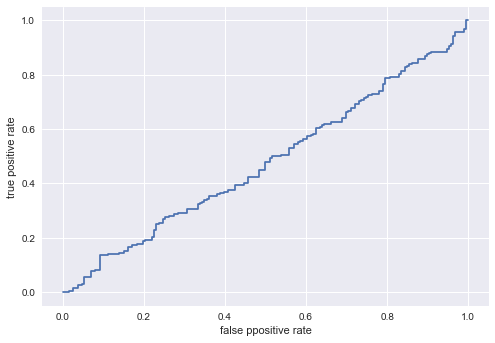

In [92]:
#logreg accuracy and roc curve for LABEL:
print 'Logistic regression accuracy score is: ' + str(accuracy_logreg)
fpr, tpr, _ = roc_curve(y_test, prob_logreg)

plt.plot(fpr,tpr)
plt.xlabel('false ppositive rate')
plt.ylabel('true positive rate')
plt.show()

Gaussian Naive Bayes accuracy score is: 0.510582010582


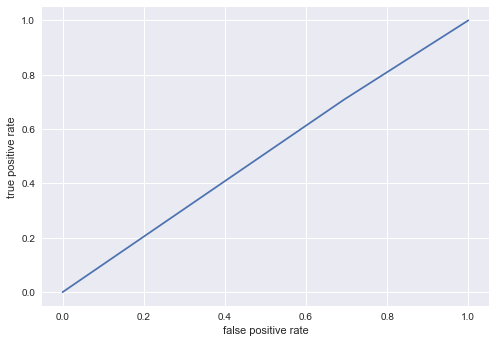

In [93]:
#Gaussian Naive Bayes accuracy and roc curve for LABEL:
print 'Gaussian Naive Bayes accuracy score is: ' + str(accuracy_gauss)
fpr, tpr, _ = roc_curve(y_test, prob_gauss)

plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

Multi Naive Bayes accuracy score is: 0.507936507937


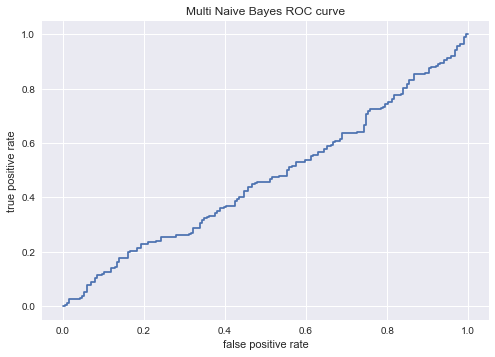

In [94]:
#Multi Naive Bayes accuracy and roc curve:
print 'Multi Naive Bayes accuracy score is: ' + str(accuracy_multi)
fpr, tpr, _ = roc_curve(y_test, prob_multi)

plt.plot(fpr,tpr)
plt.title('Multi Naive Bayes ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

SVC accuracy score is: 0.507936507937


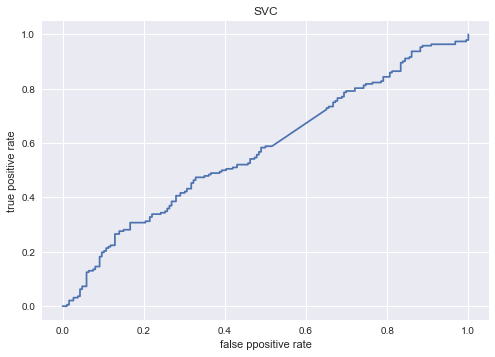

In [95]:
svc = svc.fit(X_train_tfidf,y_train)
y_pred_svc = svc.predict(X_test_tfidf)
prob_svc = svc.predict_proba(X_test_tfidf)[:,1]
accuracy_svc = accuracy_score(y_pred_svc, y_test)

#SVC accuracy and roc curve for LABEL:
print 'SVC accuracy score is: ' + str(accuracy_svc)
fpr, tpr, _ = roc_curve(y_test, prob_svc)

plt.plot(fpr,tpr)
plt.title('SVC')
plt.xlabel('false ppositive rate')
plt.ylabel('true positive rate')
plt.show()

Logistic regression 2 accuracy score is: 0.507936507937


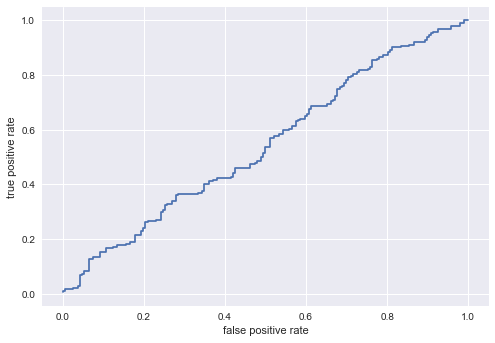

In [96]:
logreg2 = LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200)
logreg2 = logreg2.fit(X_train_advanced, y_train)

pred_logreg2 = logreg2.predict(X_test_advanced)
accuracy_logreg2 = accuracy_score(y_test,pred_logreg2)
prob_logreg2 = logreg2.predict_proba(X_test_advanced)[:,1]

#logreg2 accuracy and roc curve for LABEL:
print 'Logistic regression 2 accuracy score is: ' + str(accuracy_logreg2)
fpr, tpr, _ = roc_curve(y_test, prob_logreg2)

plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()